# Web Scrapping For Laptop Data From Flipkart and Data Analysis 

import all required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import time
from datetime import datetime

from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [2]:
#Scraping the laptops data from flipkart website 
'''This URL that you are going to scrape is the following: 
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&"+str(pageNo)
(If you can't access this link, here is the parent link). '''

no_pages = 6

#Create a function name get_data()
def get_data(pageNo):  

    r = requests.get("https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&"+str(pageNo))
    
    content = r.content
    soup = BeautifulSoup(content)

    alls = []#declare outer empty list
    
    for d in soup.findAll('div', attrs={'class':"_1AtVbE col-12-12"}):
        name = d.find('div', attrs={'class':'_4rR01T'})
        specification = d.find('li', attrs={'class':'rgWa7D'})
        rating = d.find('div', attrs={'class':'_3LWZlK'})
        users_rated = d.find('span', attrs={'class':'_2_R_DZ'})
        price = d.find('div', attrs={'class':'_30jeq3 _1_WHN1'})

        all1=[] #Declare inner empty list

        if name is not None:
            all1.append(name.text)
        else:
            all1.append("unknown-product")

        if specification is not None:
            all1.append(specification.text)
        
        else:    
            all1.append('0')

        if rating is not None:
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)  
    return alls

In [3]:
results = [] 
for i in range(1, no_pages+1):
    results.append(get_data(i)) #call function 
    
print(results)
print("total Page : ",len(results))

[[['unknown-product', '0', '-1', '0', '0'], ['unknown-product', '0', '-1', '0', '0'], ['Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 GB SSD/Windows 10 Home) 15IIL05 Laptop', 'Intel Core i3 Processor (10th Gen)', '4.4', '55 Ratings\xa0&\xa00 Reviews', '₹35,990'], ['DELL Vostro Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10) Vostro 3400 Thin and Light Laptop', 'Intel Core i3 Processor (11th Gen)', '4.2', '266 Ratings\xa0&\xa028 Reviews', '₹38,990'], ['Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 GB SSD/Windows 10 Home) 15IML05 Thin and Light Laptop', 'Intel Core i3 Processor (10th Gen)', '4.4', '738 Ratings\xa0&\xa083 Reviews', '₹36,990'], ['acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce GTX 165...', 'Free upgrade to Windows 11 when available', '4.4', '4,528 Ratings\xa0&\xa0469 Reviews', '₹49,990'], ['HP Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) 14s-DQ2100TU Thin and Light Laptop', 'Intel Core i3 Processor (11th Gen)', '4.1', '

In [4]:
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Laptop name','specification','Rating','Customers_Rated', 'Price'])

In [ ]:
#to write data from df to .csv file permanently
df.to_csv('flipkart_laptops.csv', index=False, encoding='utf-8')

In [5]:
#Reading CSV File or load csv file use inbuilt method of pandas read_csv
df = pd.read_csv("flipkart_laptops.csv")

In [6]:
df.shape

(180, 5)

In [7]:
df.columns

Index(['Laptop name', 'specification', 'Rating', 'Customers_Rated', 'Price'], dtype='object')

In [8]:
df.head()

,Laptop name,specification,Rating,Customers_Rated,Price
0,unknown-product,0,-1.0,0,0
1,unknown-product,0,-1.0,0,0
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),4.4,55 Ratings & 0 Reviews,"₹35,990"
3,DELL Vostro Core i3 11th Gen - (8 GB/256 GB SS...,Intel Core i3 Processor (11th Gen),4.2,266 Ratings & 28 Reviews,"₹38,990"
4,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),4.4,738 Ratings & 83 Reviews,"₹36,990"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Laptop name      180 non-null    object 
 1   specification    180 non-null    object 
 2   Rating           180 non-null    float64
 3   Customers_Rated  180 non-null    object 
 4   Price            180 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.2+ KB


In [10]:
df["Rating"].unique

<bound method Series.unique of 0     -1.0
1     -1.0
2      4.4
3      4.2
4      4.4
      ... 
175   -1.0
176   -1.0
177   -1.0
178    4.5
179   -1.0
Name: Rating, Length: 180, dtype: float64>

In [43]:
#change Datatype of Rating column
df['Rating'] = df['Rating'].astype(float)

In [44]:
df["Rating"]

2      4.0
3      4.0
4      4.0
5      4.0
6      4.0
      ... 
170    4.0
171    4.0
172    4.0
173    4.0
174    3.0
Name: Rating, Length: 132, dtype: float64

In [45]:
df.dtypes #check datatype

Laptop name         object
specification       object
Rating             float64
Customers_Rated    float64
Price              float64
dtype: object

In [46]:
df["Price"].unique

<bound method Series.unique of 2      35990.0
3      38990.0
4      36990.0
5      49990.0
6      40990.0
        ...   
170    67990.0
171    84990.0
172    67990.0
173    31990.0
174    21990.0
Name: Price, Length: 132, dtype: float64>

In [15]:
print(df["Price"].unique())
print(df["Price"].dtypes)

['0' '₹35,990' '₹38,990' '₹36,990' '₹49,990' '₹40,990' '₹83,990' '₹54,990'
 '₹34,990' '₹43,990' '₹59,990' '₹31,990' '₹62,990' '₹21,990' '₹37,990'
 '₹67,990' '₹32,990' '₹27,990' '₹93,990' '₹47,990' '₹97,990' '₹69,990'
 '₹79,990' '₹84,990']
object


From the price column, remove the rupees symbol and comma
and change its datatype as float 

In [16]:
df["Price"] = df["Price"].str.replace('₹', '')#remove ₹ 
df["Price"]=df["Price"].str.replace(",",'')#remove ,
print(df["Price"].unique())
print(df["Price"].dtypes)
#To change the data type of price in float
df["Price"]=df['Price'].astype("float")
#check datatype of price
print(df['Price'].dtypes)

['0' '35990' '38990' '36990' '49990' '40990' '83990' '54990' '34990'
 '43990' '59990' '31990' '62990' '21990' '37990' '67990' '32990' '27990'
 '93990' '47990' '97990' '69990' '79990' '84990']
object
float64


In [17]:
df.head()

,Laptop name,specification,Rating,Customers_Rated,Price
0,unknown-product,0,-1,0,0.0
1,unknown-product,0,-1,0,0.0
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),4,55 Ratings & 0 Reviews,35990.0
3,DELL Vostro Core i3 11th Gen - (8 GB/256 GB SS...,Intel Core i3 Processor (11th Gen),4,266 Ratings & 28 Reviews,38990.0
4,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),4,738 Ratings & 83 Reviews,36990.0


In [18]:
df["Customers_Rated"].unique()

array(['0', '55 Ratings\xa0&\xa00 Reviews',
       '266 Ratings\xa0&\xa028 Reviews', '738 Ratings\xa0&\xa083 Reviews',
       '4,528 Ratings\xa0&\xa0469 Reviews',
       '374 Ratings\xa0&\xa036 Reviews', '307 Ratings\xa0&\xa032 Reviews',
       '4,061 Ratings\xa0&\xa0400 Reviews',
       '86 Ratings\xa0&\xa014 Reviews',
       '1,115 Ratings\xa0&\xa0111 Reviews',
       '923 Ratings\xa0&\xa0143 Reviews',
       '1,604 Ratings\xa0&\xa0256 Reviews',
       '1,677 Ratings\xa0&\xa0204 Reviews',
       '104 Ratings\xa0&\xa024 Reviews',
       '1,258 Ratings\xa0&\xa0157 Reviews',
       '310 Ratings\xa0&\xa040 Reviews', '129 Ratings\xa0&\xa023 Reviews',
       '458 Ratings\xa0&\xa063 Reviews', '543 Ratings\xa0&\xa047 Reviews',
       '701 Ratings\xa0&\xa060 Reviews', '116 Ratings\xa0&\xa09 Reviews',
       '923 Ratings\xa0&\xa0121 Reviews', '61 Ratings\xa0&\xa06 Reviews',
       '72 Ratings\xa0&\xa010 Reviews', '12 Ratings\xa0&\xa03 Reviews',
       '163 Ratings\xa0&\xa025 Reviews', '373 Rat

In [ ]:
From the customers_rated column we want number of customer rated only 

In [19]:
df["Customers_Rated"]=df["Customers_Rated"].apply(lambda x: x.split()[0])

In [20]:
df.head()

,Laptop name,specification,Rating,Customers_Rated,Price
0,unknown-product,0,-1,0,0.0
1,unknown-product,0,-1,0,0.0
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),4,55,35990.0
3,DELL Vostro Core i3 11th Gen - (8 GB/256 GB SS...,Intel Core i3 Processor (11th Gen),4,266,38990.0
4,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),4,738,36990.0


In [21]:
df["Customers_Rated"].unique()

array(['0', '55', '266', '738', '4,528', '374', '307', '4,061', '86',
       '1,115', '923', '1,604', '1,677', '104', '1,258', '310', '129',
       '458', '543', '701', '116', '61', '72', '12', '163', '373'],
      dtype=object)

In [22]:
df.dtypes

Laptop name         object
specification       object
Rating               int64
Customers_Rated     object
Price              float64
dtype: object

Remove comma from Customers_Rated column and change it to numeric format 

In [23]:
df["Customers_Rated"]=df["Customers_Rated"].str.replace(",",'')
df['Customers_Rated'] = pd.to_numeric(df['Customers_Rated'], errors='ignore')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Laptop name      180 non-null    object 
 1   specification    180 non-null    object 
 2   Rating           180 non-null    int64  
 3   Customers_Rated  180 non-null    int64  
 4   Price            180 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.2+ KB


In [25]:
df.isnull().sum()

Laptop name        0
specification      0
Rating             0
Customers_Rated    0
Price              0
dtype: int64

Replace the zero values in the DataFrame to NaN. null means np.nan

In [26]:
df.replace(0, np.nan, inplace=True)

In [27]:
df.isnull().sum()

Laptop name         0
specification       0
Rating              0
Customers_Rated    48
Price              36
dtype: int64

In [28]:
#Let's drop these NaNs.
#to delete those rows whose found null
df = df.dropna()
#check null value after delete null row
df.isnull().sum()

Laptop name        0
specification      0
Rating             0
Customers_Rated    0
Price              0
dtype: int64

In [29]:
df.head()

,Laptop name,specification,Rating,Customers_Rated,Price
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),4,55.0,35990.0
3,DELL Vostro Core i3 11th Gen - (8 GB/256 GB SS...,Intel Core i3 Processor (11th Gen),4,266.0,38990.0
4,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),4,738.0,36990.0
5,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,Free upgrade to Windows 11 when available,4,4528.0,49990.0
6,HP Core i3 11th Gen - (8 GB/256 GB SSD/Windows...,Intel Core i3 Processor (11th Gen),4,374.0,40990.0


In [30]:
df.columns

Index(['Laptop name', 'specification', 'Rating', 'Customers_Rated', 'Price'], dtype='object')

# Visualization

Plot bar graph for company wise laptop avilable on flipkart

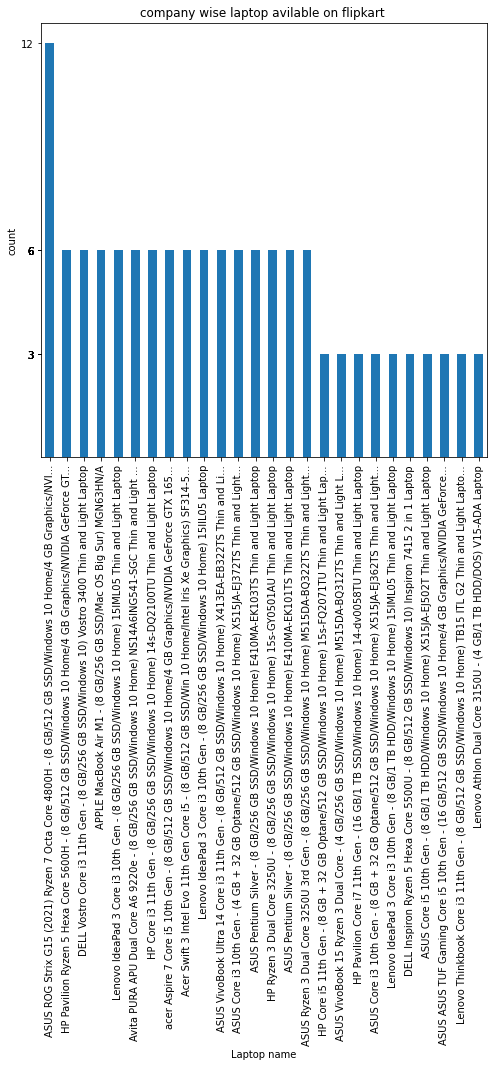

In [31]:
plt.figure(figsize=(8,8))
df["Laptop name"].value_counts().plot(kind="bar") 
c=df["Laptop name"].value_counts()
plt.yticks(c)
plt.ylabel("count")
plt.xlabel("Laptop name")
plt.title("company wise laptop avilable on flipkart ")
plt.show()

Plot bar graph fot Laptop avilable by specification

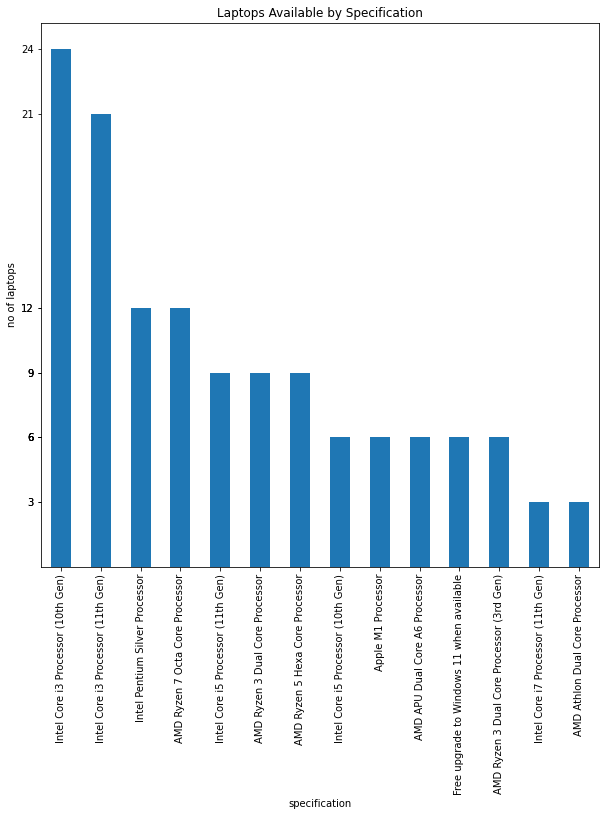

In [38]:
#To check no of laptop avilable by specification 
plt.figure(figsize=(10,10))
df["specification"].value_counts().plot(kind="bar")
d=df["specification"].value_counts()
plt.yticks(d)
plt.ylabel("no of laptops")
plt.xlabel("specification")
plt.title("Laptops Available by Specification")
plt.show()


Bar graph for price range of laptop 

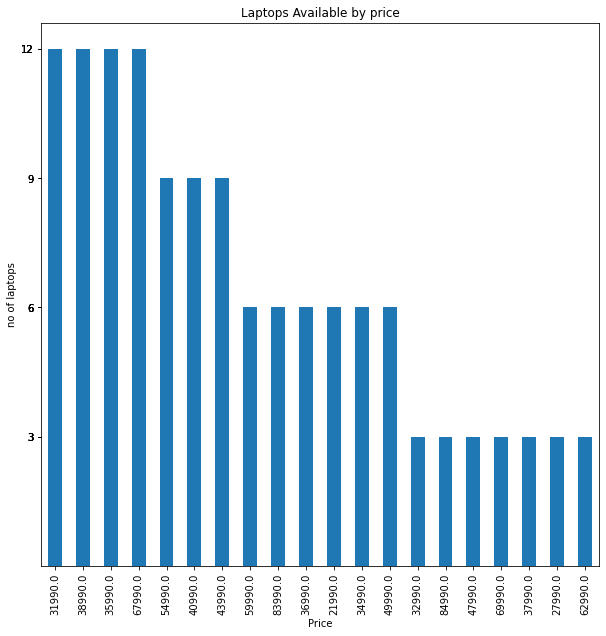

In [39]:
#To check no of laptop avilable by Price
plt.figure(figsize=(10,10))
df["Price"].value_counts().plot(kind="bar")
d=df["Price"].value_counts()
plt.yticks(d)
plt.ylabel("no of laptops")
plt.xlabel("Price")
plt.title("Laptops Available by price")
plt.show()


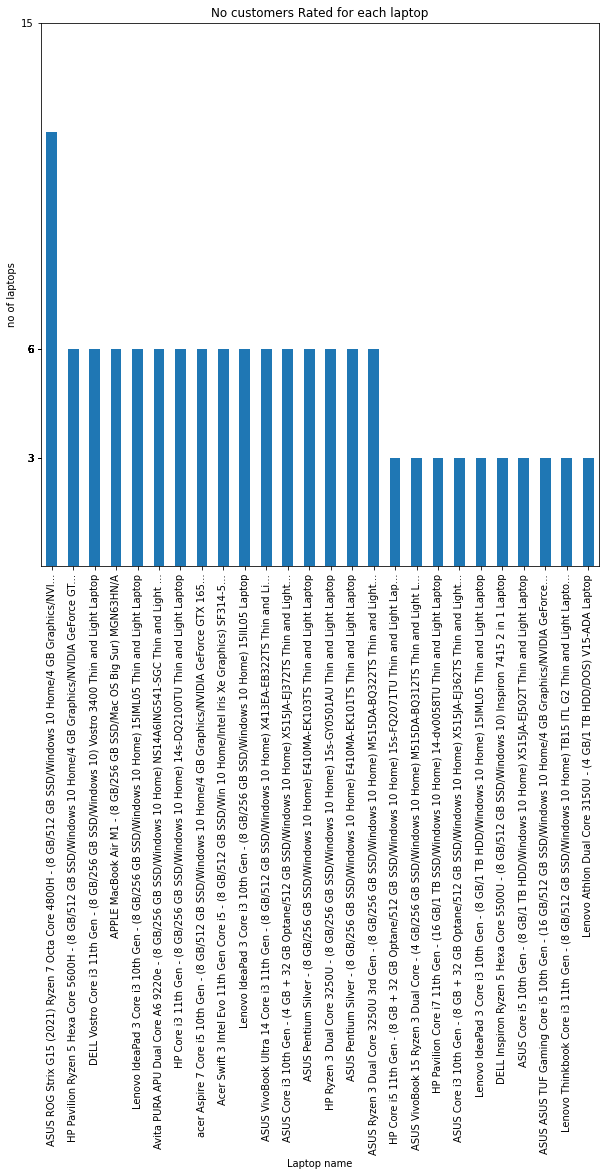

In [42]:
#To check no of laptop avilable by specification 
plt.figure(figsize=(10,10))
df["Laptop name"].value_counts().plot(kind="bar")
d=df["Customers_Rated"].value_counts()
plt.yticks(d)
plt.ylabel("no of laptops")
plt.xlabel("Laptop name")
plt.title("No customers Rated for each laptop")
plt.show()
